In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Statistics\Hypothesis Project\Hypothesis Project\yellow_tripdata_2020-01.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [4]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [5]:
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data.shape

(6405008, 19)

In [6]:
data.dropna(inplace=True)
data.shape

(6339567, 19)

## Phase-1:

#### 1. The "Ghost" Rides: "We are seeing trips with trip_distance = 0 but the meter was still running. How many of these exist? Are they valid (e.g.,stuck in traffic) or system errors? Please analyze and handle them."

In [7]:
data[data['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.0,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0,0 days 00:00:04
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.0,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5,0 days 00:01:10
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.0,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,0 days 00:01:00
19,1.0,2020-01-01 00:25:39,2020-01-01 00:27:05,1.0,0.0,1.0,N,170,162,4.0,3.00,3.0,0.5,0.00,0.0,0.3,6.80,2.5,0 days 00:01:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339436,1.0,2020-01-31 23:51:05,2020-01-31 23:51:08,1.0,0.0,1.0,N,132,132,3.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0 days 00:00:03
6339482,2.0,2020-02-01 00:00:07,2020-02-01 00:00:14,1.0,0.0,5.0,N,265,264,1.0,228.00,0.0,0.5,45.76,0.0,0.3,274.56,0.0,0 days 00:00:07
6339489,2.0,2020-01-31 23:55:57,2020-02-01 00:04:03,1.0,0.0,1.0,N,114,114,2.0,6.50,0.5,0.5,0.00,0.0,0.3,10.30,2.5,0 days 00:08:06
6339508,1.0,2020-01-31 23:14:54,2020-01-31 23:15:57,1.0,0.0,1.0,N,132,132,3.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0 days 00:01:03


- There are 67476 trips having trip distance=0.

- Here I can see some trips having customer pickup location and drop off location are same that is not possible , aslo some trips are no customer so we remove the details. 

In [8]:
data = data[data['trip_distance'] != 0]
data.shape

(6272091, 19)

#### 2. The Negative Money Problem: "Our accounting team found rows with negative fare_amount and total_amount. We can't have negative revenue. Identify these rows. Is it a specific payment_type causing this? Remove or fix them."

In [9]:
data[(data['fare_amount'] < 0) | (data['total_amount'] < 0)].sample(n=50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
1252061,2.0,2020-01-08 08:11:57,2020-01-08 08:18:00,3.0,0.62,1.0,N,48,161,3.0,-5.5,0.0,-0.5,0.00,0.00,-0.3,-8.80,-2.5,0 days 00:06:03
226278,2.0,2020-01-02 12:28:23,2020-01-02 12:49:24,1.0,2.93,1.0,N,161,144,2.0,-15.0,0.0,-0.5,0.00,0.00,-0.3,-18.30,-2.5,0 days 00:21:01
2339037,2.0,2020-01-13 09:05:53,2020-01-13 09:23:11,4.0,2.93,1.0,N,162,144,4.0,-13.5,0.0,-0.5,0.00,0.00,-0.3,-16.80,-2.5,0 days 00:17:18
6256113,2.0,2020-01-31 17:56:54,2020-01-31 18:05:00,4.0,0.03,1.0,N,230,161,4.0,-6.5,-1.0,-0.5,0.00,0.00,-0.3,-10.80,-2.5,0 days 00:08:06
3371128,2.0,2020-01-17 20:50:47,2020-01-17 20:56:44,1.0,0.63,1.0,N,100,230,3.0,-5.5,-0.5,-0.5,0.00,0.00,-0.3,-9.30,-2.5,0 days 00:05:57
5084519,2.0,2020-01-26 04:32:28,2020-01-26 04:57:34,1.0,11.09,1.0,N,164,138,4.0,-32.5,-0.5,-0.5,0.00,0.00,-0.3,-36.30,-2.5,0 days 00:25:06
5619015,2.0,2020-01-28 21:45:51,2020-01-28 21:59:08,1.0,4.13,1.0,N,164,151,4.0,-14.5,-0.5,-0.5,0.00,0.00,-0.3,-18.30,-2.5,0 days 00:13:17
4415550,2.0,2020-01-23 09:45:14,2020-01-23 09:45:31,3.0,0.03,2.0,N,230,230,4.0,-52.0,0.0,-0.5,0.00,-6.12,-0.3,-61.42,-2.5,0 days 00:00:17
4914478,2.0,2020-01-25 12:12:30,2020-01-25 12:17:03,1.0,0.97,1.0,N,158,90,2.0,-5.5,0.0,-0.5,0.00,0.00,-0.3,-8.80,-2.5,0 days 00:04:33
1171299,2.0,2020-01-07 18:21:34,2020-01-07 18:53:51,1.0,14.04,1.0,N,132,226,3.0,-39.5,-1.0,-0.5,0.00,0.00,-0.3,-41.30,0.0,0 days 00:32:17


- Yes,it is a specific payment type causing because here I can see no one can use card for payment every one uses other payment type so it's not possible we remove this rows.

In [10]:
data=data[data['fare_amount']>0]
data=data[data['total_amount']>0]

In [11]:
data[(data['fare_amount'] < 0) | (data['total_amount'] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration


#### 3. The Silent Passenger: "We have trips with passenger_count = 0. Is this possible? (maybe package delivery?). If it's less than 1% of data, remove it. If it's more, keep it and explain why."

In [12]:
data[data['passenger_count']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
262,1.0,2020-01-01 00:30:01,2020-01-01 00:39:06,0.0,1.4,1.0,N,234,114,1.0,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5,0 days 00:09:05
263,1.0,2020-01-01 00:40:50,2020-01-01 00:50:05,0.0,1.5,1.0,N,114,137,1.0,8.0,3.0,0.5,2.35,0.00,0.3,14.15,2.5,0 days 00:09:15
264,1.0,2020-01-01 00:54:17,2020-01-01 01:08:08,0.0,2.5,1.0,Y,137,144,2.0,11.5,3.0,0.5,0.00,0.00,0.3,15.30,2.5,0 days 00:13:51
279,1.0,2020-01-01 00:34:58,2020-01-01 00:45:28,0.0,2.8,1.0,N,145,224,2.0,11.0,3.0,0.5,0.00,6.12,0.3,20.92,2.5,0 days 00:10:30
281,1.0,2020-01-01 00:55:25,2020-01-01 01:10:34,0.0,2.6,1.0,N,137,140,1.0,11.5,3.0,0.5,3.05,0.00,0.3,18.35,2.5,0 days 00:15:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339069,1.0,2020-01-31 23:10:10,2020-01-31 23:42:25,0.0,15.9,1.0,N,132,145,1.0,46.0,0.5,0.5,10.00,0.00,0.3,57.30,0.0,0 days 00:32:15
6339070,1.0,2020-01-31 23:51:26,2020-01-31 23:57:39,0.0,1.9,1.0,N,229,107,1.0,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5,0 days 00:06:13
6339526,1.0,2020-01-31 23:51:21,2020-01-31 23:57:20,0.0,0.8,1.0,N,79,148,1.0,6.0,3.0,0.5,1.76,0.00,0.3,11.56,2.5,0 days 00:05:59
6339537,1.0,2020-01-31 23:43:08,2020-01-31 23:50:53,0.0,1.1,1.0,N,234,186,2.0,7.0,3.0,0.5,0.00,0.00,0.3,10.80,2.5,0 days 00:07:45


In [13]:
percent =(data[data['passenger_count']==0].shape[0] / data.shape[0])*100
percent

1.7924227642328427

- The data is greater than 1% ,So we don't remove the data because there is trip distance maybe package delivery.

#### 4. The Time Travelers: "Check for trips where the dropoff_datetime is before the pickup_datetime. These are obvious errors."

In [14]:
data['duration'] = data['duration'].dt.total_seconds()/60

In [15]:
data[data['duration']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
540040,1.0,2020-01-04 08:19:55,2020-01-02 10:09:33,1.0,3.5,1.0,N,107,237,1.0,16.5,2.5,0.5,4.95,0.0,0.3,24.75,2.5,-2770.366667


## Phase-2:

#### 1. The "Golden Hours": "When is our fleet busiest? I want a heatmap or bar chart showing the average number of trips by Hour of Day. Do we need more drivers at 5 AM or 5 PM?"

In [16]:
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['date'] = data['tpep_pickup_datetime'].dt.date

In [17]:
daily_hourly = data.groupby(['date', 'hour']).size().reset_index(name='trips')

In [18]:
avg_hourly_trips = daily_hourly.groupby('hour')['trips'].mean()

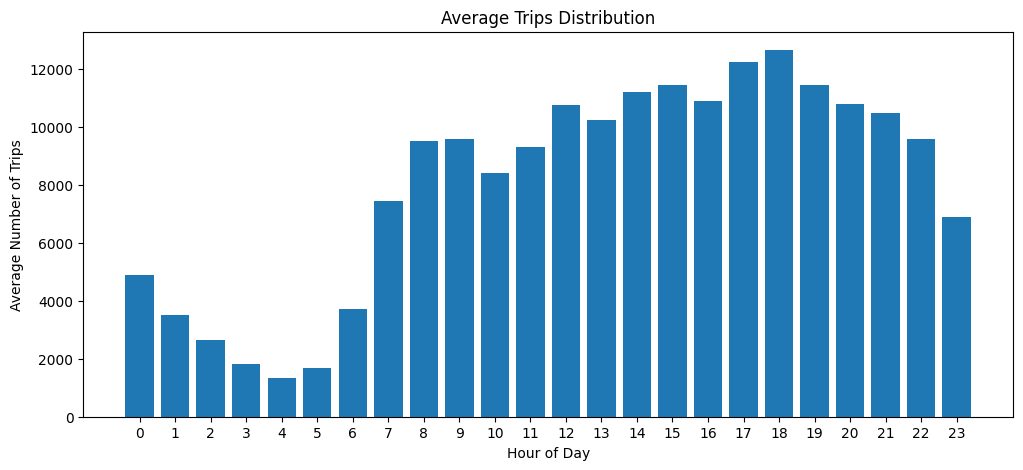

In [19]:
plt.figure(figsize=(12,5))
plt.bar(avg_hourly_trips.index, avg_hourly_trips.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Trips")
plt.title("Average Trips Distribution")
plt.xticks(range(0,24))
plt.show()

- Yes we need more drivers at 5pm because at the evening time the average number of trips are 12000 but we don't need more drivers at 5am.

#### 2. The Solo vs. Group Traveler: "Do people mostly travel alone or in groups? What is the most common passenger_count? Does the tip_amount increase if there are more passengers?"

In [20]:
data['passenger_count'].value_counts()

passenger_count
1.0    4478738
2.0     936769
3.0     248045
5.0     224480
6.0     131582
4.0     121811
0.0     112090
7.0         17
9.0          8
8.0          7
Name: count, dtype: int64

- Here you can see most of our customer travels in solo.

passenger_count
0.0     2.114498
1.0     2.216811
2.0     2.220242
3.0     2.149411
4.0     2.034158
5.0     2.214030
6.0     2.229640
7.0     7.078824
8.0     6.834286
9.0    10.283750
Name: tip_amount, dtype: float64


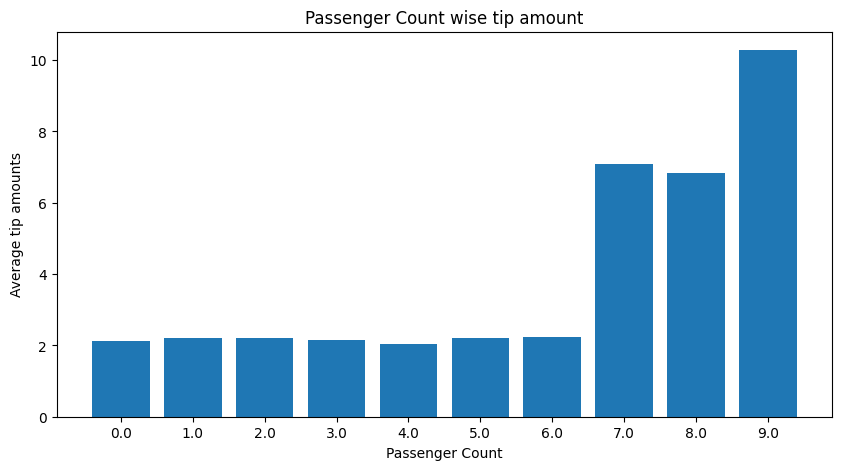

In [21]:
tip = data.groupby('passenger_count')['tip_amount'].mean().sort_index()
print(tip)

#Visualization:
plt.figure(figsize=(10,5))
plt.bar(tip.index.astype(str), tip.values)
plt.title('Passenger Count wise tip amount')
plt.xlabel('Passenger Count')
plt.ylabel('Average tip amounts')
plt.show()

- Tip amount does NOT increase much with more passengers because group trips are very less.

#### 3. The Payment Split: "What percentage of our customers pay by Credit Card vs. Cash (payment_type)? Is there a difference in the average tip_amount between card users and cash users?" ( Hint: This is a classic behavioral insight.)

In [22]:
data['payment_type'].value_counts(normalize=True)*100

payment_type
1.0    74.408284
2.0    25.121231
3.0     0.342670
4.0     0.127815
Name: proportion, dtype: float64

payment_type
1.0    2.969282
2.0    0.000198
Name: tip_amount, dtype: float64


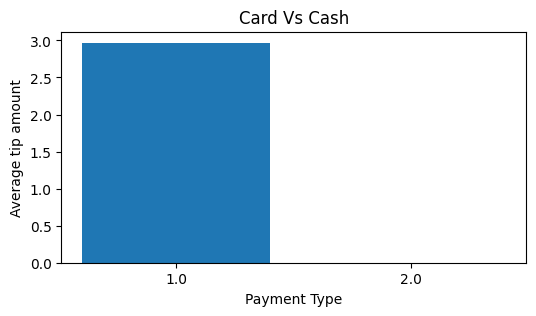

In [23]:
payment_type_tip = data.groupby('payment_type')['tip_amount'].mean().sort_index().head(2)
print(payment_type_tip)

#Visualization:
plt.figure(figsize=(6,3))
plt.bar(payment_type_tip.index.astype(str), payment_type_tip.values)
plt.title('Card Vs Cash')
plt.xlabel('Payment Type')
plt.ylabel('Average tip amount')
plt.show()

- There are very big difference between card and cash users.

#### 4. The Airport Run: "We suspect trips with RatecodeID = 2 (JFK Airport) have a higher average fare than standard city trips (RatecodeID = 1). Can you prove this with data?"

RatecodeID
1.0    11.106660
2.0    51.986748
Name: fare_amount, dtype: float64


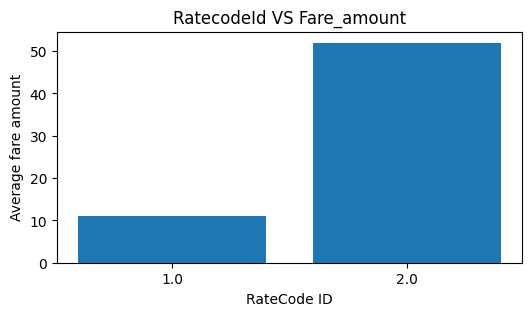

In [24]:
ratecode = data.groupby('RatecodeID')['fare_amount'].mean().head(2)
print(ratecode)

#Visualization:
plt.figure(figsize=(6,3))
plt.bar(ratecode.index.astype(str), ratecode.values)
plt.title('RatecodeId VS Fare_amount')
plt.xlabel('RateCode ID')
plt.ylabel('Average fare amount')
plt.show()

- Here it proves RateCode=2 (JFK Airport) have a higher average fare than RateCode = 1.

## Phase-3:

#### 1. Congestion Impact: "We charge a congestion_surcharge. Does this surcharge discourage people? Compare the trip volume for trips with surcharge vs. without. What is your recommendation? Should we lobby to remove it?"

In [25]:
with_surcharge = data[data['congestion_surcharge'] > 0]
without_surcharge = data[data['congestion_surcharge'] == 0]

a = len(with_surcharge)
b = len(without_surcharge)
a,b

(5826757, 426790)

- Here trip with surcharges are high. So no need to remove it.

#### 2. The "Whale" Locations: "Which Pickup Location (PULocationID) generates the highest total revenue? Identify the Top 3 locations and recommend where we should station our empty taxis."

PULocationID
132    8967655.51
138    3845761.29
161    3157571.56
230    2712266.66
237    2630703.85
Name: fare_amount, dtype: float64


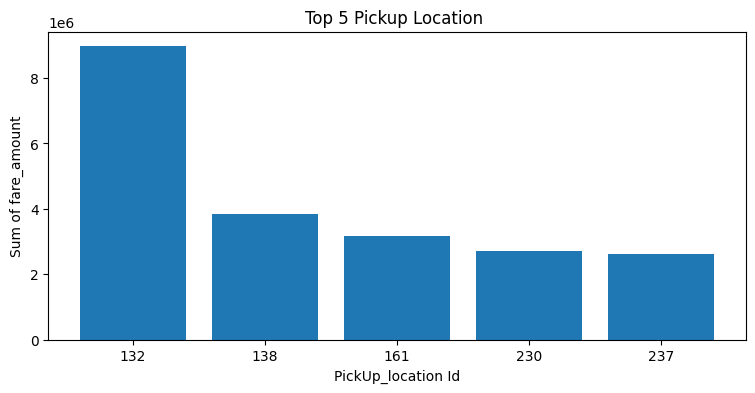

In [26]:
pickup_location = data.groupby('PULocationID')['fare_amount'].sum().sort_values(ascending=False).head()
print(pickup_location)

# Visualization:
plt.figure(figsize=(9,4))
plt.bar(pickup_location.index.astype(str), pickup_location.values)
plt.title('Top 5 Pickup Location ')
plt.xlabel('PickUp_location Id')
plt.ylabel('Sum of fare_amount')
plt.show()

- The pickup location id (132,138,161) these are the top 3 locations where we should station our empty taxis.

## Phase-4:

#### 1. The "Time Travel" Bug (Duration Calculation):"We need a trip_duration column (in minutes). But be careful—I ran a quick check and found trips with negative duration (e.g., Dropoff was before Pickup). Find them, count them, and kill them. They are corrupting our averages."

In [27]:
data[data['duration']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,date
540040,1.0,2020-01-04 08:19:55,2020-01-02 10:09:33,1.0,3.5,1.0,N,107,237,1.0,...,2.5,0.5,4.95,0.0,0.3,24.75,2.5,-2770.366667,8,2020-01-04


In [28]:
# Remove the negative duration:
data = data[data['duration']>0]

#### 2. The "Rocket Car" Anomaly (Speed Analysis):
- "Calculate the average speed (speed_mph) for every trip.
- Logic Check: Speed = Distance / (Duration_in_Hours).
- The Problem: We suspect some drivers are spoofing GPS. If a trip shows a speed > 100 MPH or < 0 MPH, flag it as 'Data Error'. How many rows do we
lose?"

In [29]:
data['duration'] = pd.to_timedelta(data['duration'])
data['duration_hours'] = data['duration'].dt.total_seconds() / 3600

In [30]:
# average speed for every trip
data['speed_mph'] = data['trip_distance'] / data['duration_hours']

In [31]:
data['speed_issue'] = (
    (data['speed_mph'] > 100) |
    (data['speed_mph'] < 0) |
    (data['duration_hours'] <= 0) |
    (data['trip_distance'] < 0)
)

In [32]:
bad_rows = data['speed_issue'].sum()
bad_rows

np.int64(6253354)

In [33]:
good_rows = len(data) - bad_rows
good_rows

np.int64(0)

In [34]:
clean_data = data.loc[~data['speed_issue'], ['speed_mph','trip_distance','duration_hours','fare_amount']]

## Phase-5:

#### 1. VeriFone (1) vs. Creative Mobile (2):
- "We use two providers for our in-car systems: Vendor 1 and Vendor 2.
- Vendor 2 handles ~70% of our rides. But who is actually better?
- The Challenge: Compare the Average Tip Amount for Vendor 1 vs. Vendor 2. Does the interface of one machine encourage better tipping? This is a huge potential revenue find for our drivers."

In [35]:
group =data.groupby('VendorID')['tip_amount'].mean()
group

VendorID
1.0    2.138939
2.0    2.243977
Name: tip_amount, dtype: float64

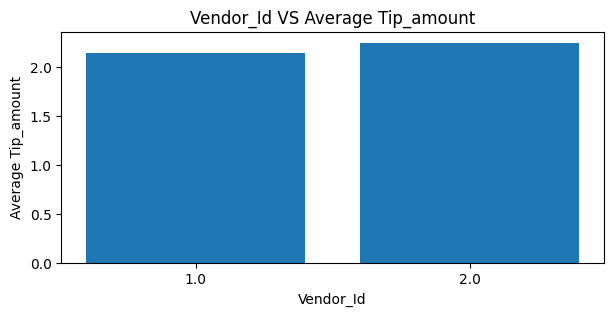

In [47]:
plt.figure(figsize=(7,3))
plt.bar(group.index.astype(str),group.values)
plt.title('Vendor_Id VS Average Tip_amount')
plt.xlabel('Vendor_Id')
plt.ylabel('Average Tip_amount')
plt.show()

- Vendor 2 gets slightly higher tips than Vendor 1. Even though the difference per trip is small, it becomes very big when you look at thousands of rides. This means Vendor 2’s machine likely makes it easier for passengers to leave tips. If more taxis use Vendor 2, drivers can earn a lot more money overall.

## Phase-6:

####  1. The "RateCode 99" Mystery:
- "Standard trips are RateCode 1. JFK Airport is RateCode 2.
- But my tech team says we have 64 trips with RatecodeID = 99.
- What are these? Are they high value? Low value? Scams? Isolate these 64 rows and tell me what they have in common."

In [46]:
data[data['RatecodeID'] == 99].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,date,duration_hours,speed_mph,speed_issue,route
1968,2.0,2020-01-01 00:24:18,2020-01-01 00:52:47,1.0,2.15,99.0,N,246,48,2.0,...,0.3,20.8,2.5,0 days 00:00:00.000000028,0,2020-01-01,7.777778e-12,2.764286e+11,True,246 -> 48
13339,2.0,2020-01-01 01:17:27,2020-01-01 01:28:53,2.0,1.90,99.0,N,164,148,2.0,...,0.3,13.3,2.5,0 days 00:00:00.000000011,1,2020-01-01,3.055556e-12,6.218182e+11,True,164 -> 148
22212,2.0,2020-01-01 01:13:07,2020-01-01 01:27:07,1.0,2.56,99.0,N,80,148,2.0,...,0.3,15.8,2.5,0 days 00:00:00.000000014,1,2020-01-01,3.888889e-12,6.582857e+11,True,80 -> 148
31133,2.0,2020-01-01 02:55:45,2020-01-01 03:00:32,1.0,0.66,99.0,N,68,90,2.0,...,0.3,8.8,2.5,0 days 00:00:00.000000004,2,2020-01-01,1.111111e-12,5.940000e+11,True,68 -> 90
57511,2.0,2020-01-01 04:01:35,2020-01-01 04:16:23,2.0,6.83,99.0,N,232,263,2.0,...,0.3,24.8,2.5,0 days 00:00:00.000000014,4,2020-01-01,3.888889e-12,1.756286e+12,True,232 -> 263


In [38]:
a= data[data['RatecodeID'] == 99]
a['fare_amount'].describe()

count    161.000000
mean      13.086957
std       12.181000
min        2.500000
25%        6.000000
50%        9.000000
75%       14.000000
max       62.000000
Name: fare_amount, dtype: float64

- The RateCode 99 are not high value or not low value and the average is 13 so there are small trip distance.

## Phase-7:

#### The "Commuter Loop":
- "Find the Top 5 most popular pairs of Pickup (PULocationID) and Dropoff (DOLocationID) locations.
- Hint: Create a new column route = PULocationID -> DOLocationID.
- The Question: Are the top routes long cross-city trips, or just short hops (e.g., 237 -> 236)? If they are short hops, we should deploy electric
scooters there instead of taxis."

In [39]:
data['route'] = data['PULocationID'].astype(str) + " -> " + data['DOLocationID'].astype(str)

- The top 5 most pairs of Pickup :

route
237 -> 236    45440
236 -> 237    38166
236 -> 236    38028
237 -> 237    33116
264 -> 264    23362
Name: count, dtype: int64


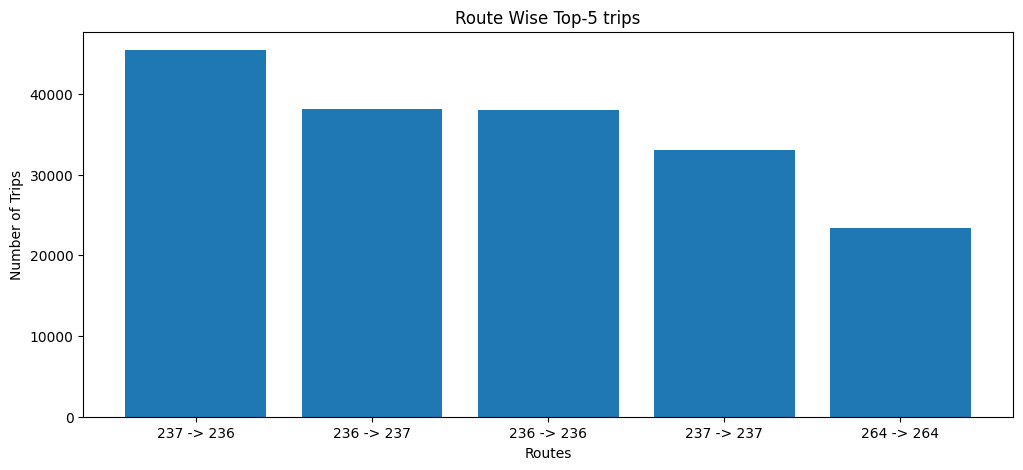

In [40]:
# Top-5 most pairs of pickup
top_5= data['route'].value_counts().sort_values(ascending=False).head()
print(top_5)

# Visualization Chart
plt.figure(figsize=(12,5))
plt.bar(top_5.index, top_5.values)
plt.title('Route Wise Top-5 trips')
plt.xlabel('Routes')
plt.ylabel('Number of Trips')
plt.show()

- Yes, these are short trips so we should deploy electric scooters there instead of taxis.

##################################################################################################################################

In [41]:
data.shape

(6253354, 25)

In [42]:
data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
duration                 0
hour                     0
date                     0
duration_hours           0
speed_mph                0
speed_issue              0
route                    0
dtype: int64

In [43]:
data[data.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,date,duration_hours,speed_mph,speed_issue,route


In [44]:
data.shape

(6253354, 25)

In [45]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,date,duration_hours,speed_mph,speed_issue,route
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,0.3,11.27,2.5,0 days 00:00:00.000000004,0,2020-01-01,1.111111e-12,1.080000e+12,True,238 -> 239
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,...,0.3,12.30,2.5,0 days 00:00:00.000000007,0,2020-01-01,1.944444e-12,6.171429e+11,True,239 -> 238
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,...,0.3,10.80,2.5,0 days 00:00:00.000000006,0,2020-01-01,1.666667e-12,3.600000e+11,True,238 -> 238
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,...,0.3,8.16,0.0,0 days 00:00:00.000000004,0,2020-01-01,1.111111e-12,7.200000e+11,True,238 -> 151
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,...,0.3,3.80,0.0,0 days 00:00:00,0,2020-01-01,0.000000e+00,inf,True,7 -> 193
